# Portfolio Analysis of healthcare sector

### Stocks under observation:

    - Biogen Inc. (NYSE:BIIB) 
    - Boston Scientific Corp. (NYSE:BSX)
    - Regeneron Pharmaceuticals Inc. (NYSE:REGN)
    - Gilead Sciences Inc. (NYSE:GILD)
    - ResMed Inc. (NYSE:RMD)
    - Vertex Pharmaceuticals Inc. (NYSE: VRTX)


In [23]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [24]:
healthcare = ['BIIB', 'BSX', 'REGN', 'GILD','RMD', 'VRTX' ]
data = pd.DataFrame()
for i in range(len(healthcare)):
    
    df = wb.DataReader(healthcare[i], data_source='yahoo', start='2019-1-1', end = '2020-1-1')
    df['stock'] = healthcare[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,BIIB,BSX,GILD,REGN,RMD,VRTX
Date,,,,,,
2019-01-02,304.690002,34.459999,60.526627,372.440002,109.845505,164.080002
2019-01-03,307.000000,32.910000,62.253502,372.079987,104.646591,163.729996
2019-01-04,318.329987,34.209999,65.115730,397.549988,108.292717,172.699997
2019-01-07,322.399994,34.419998,65.411491,396.630005,109.304970,175.850006
2019-01-08,324.440002,35.380001,64.963081,397.260010,111.555550,178.190002


Text(0, 0.5, 'price in $')

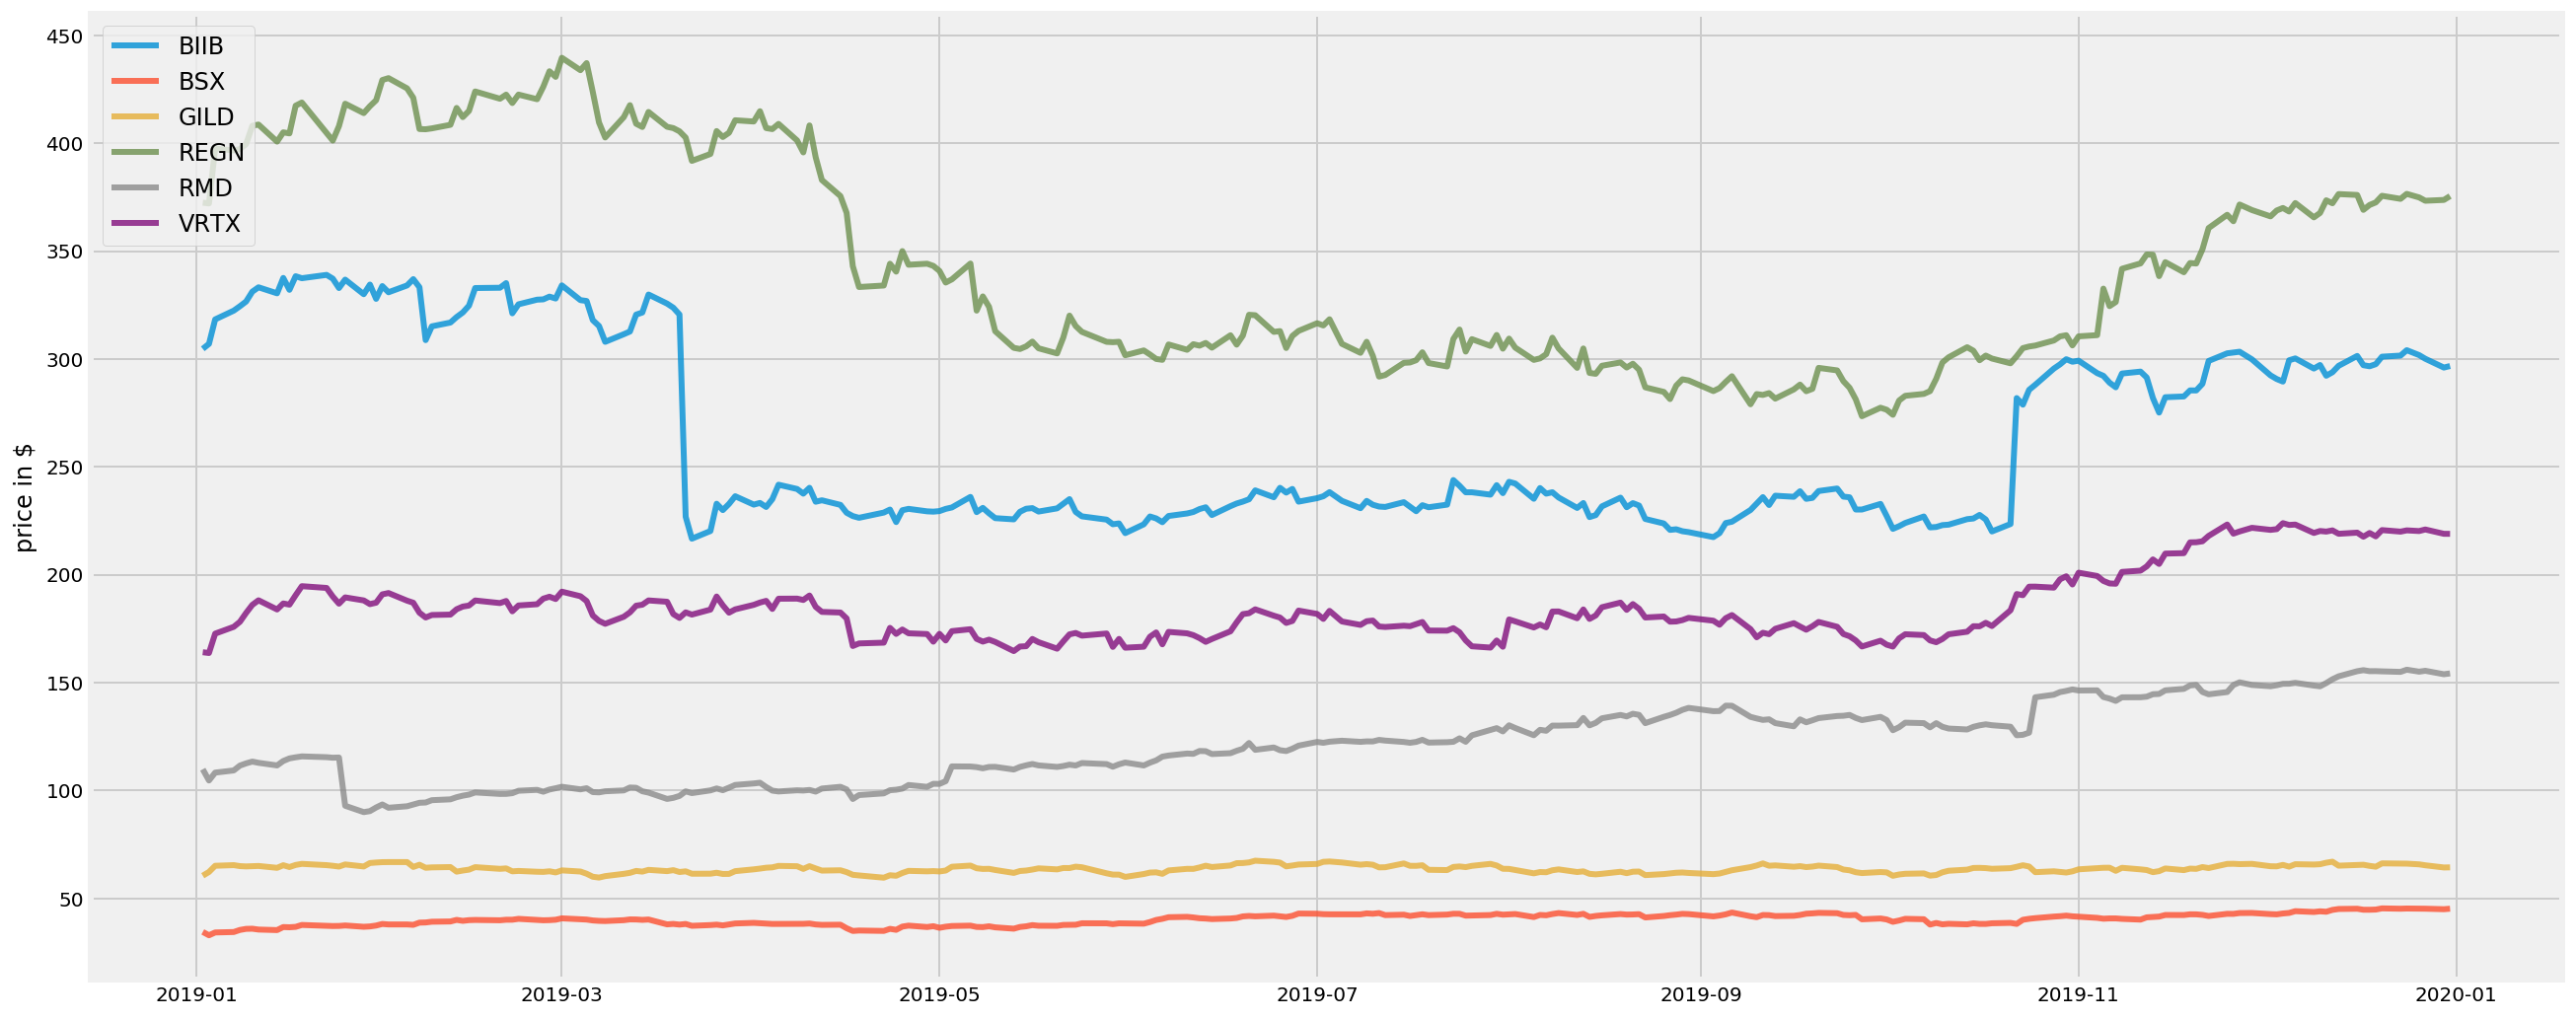

In [25]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

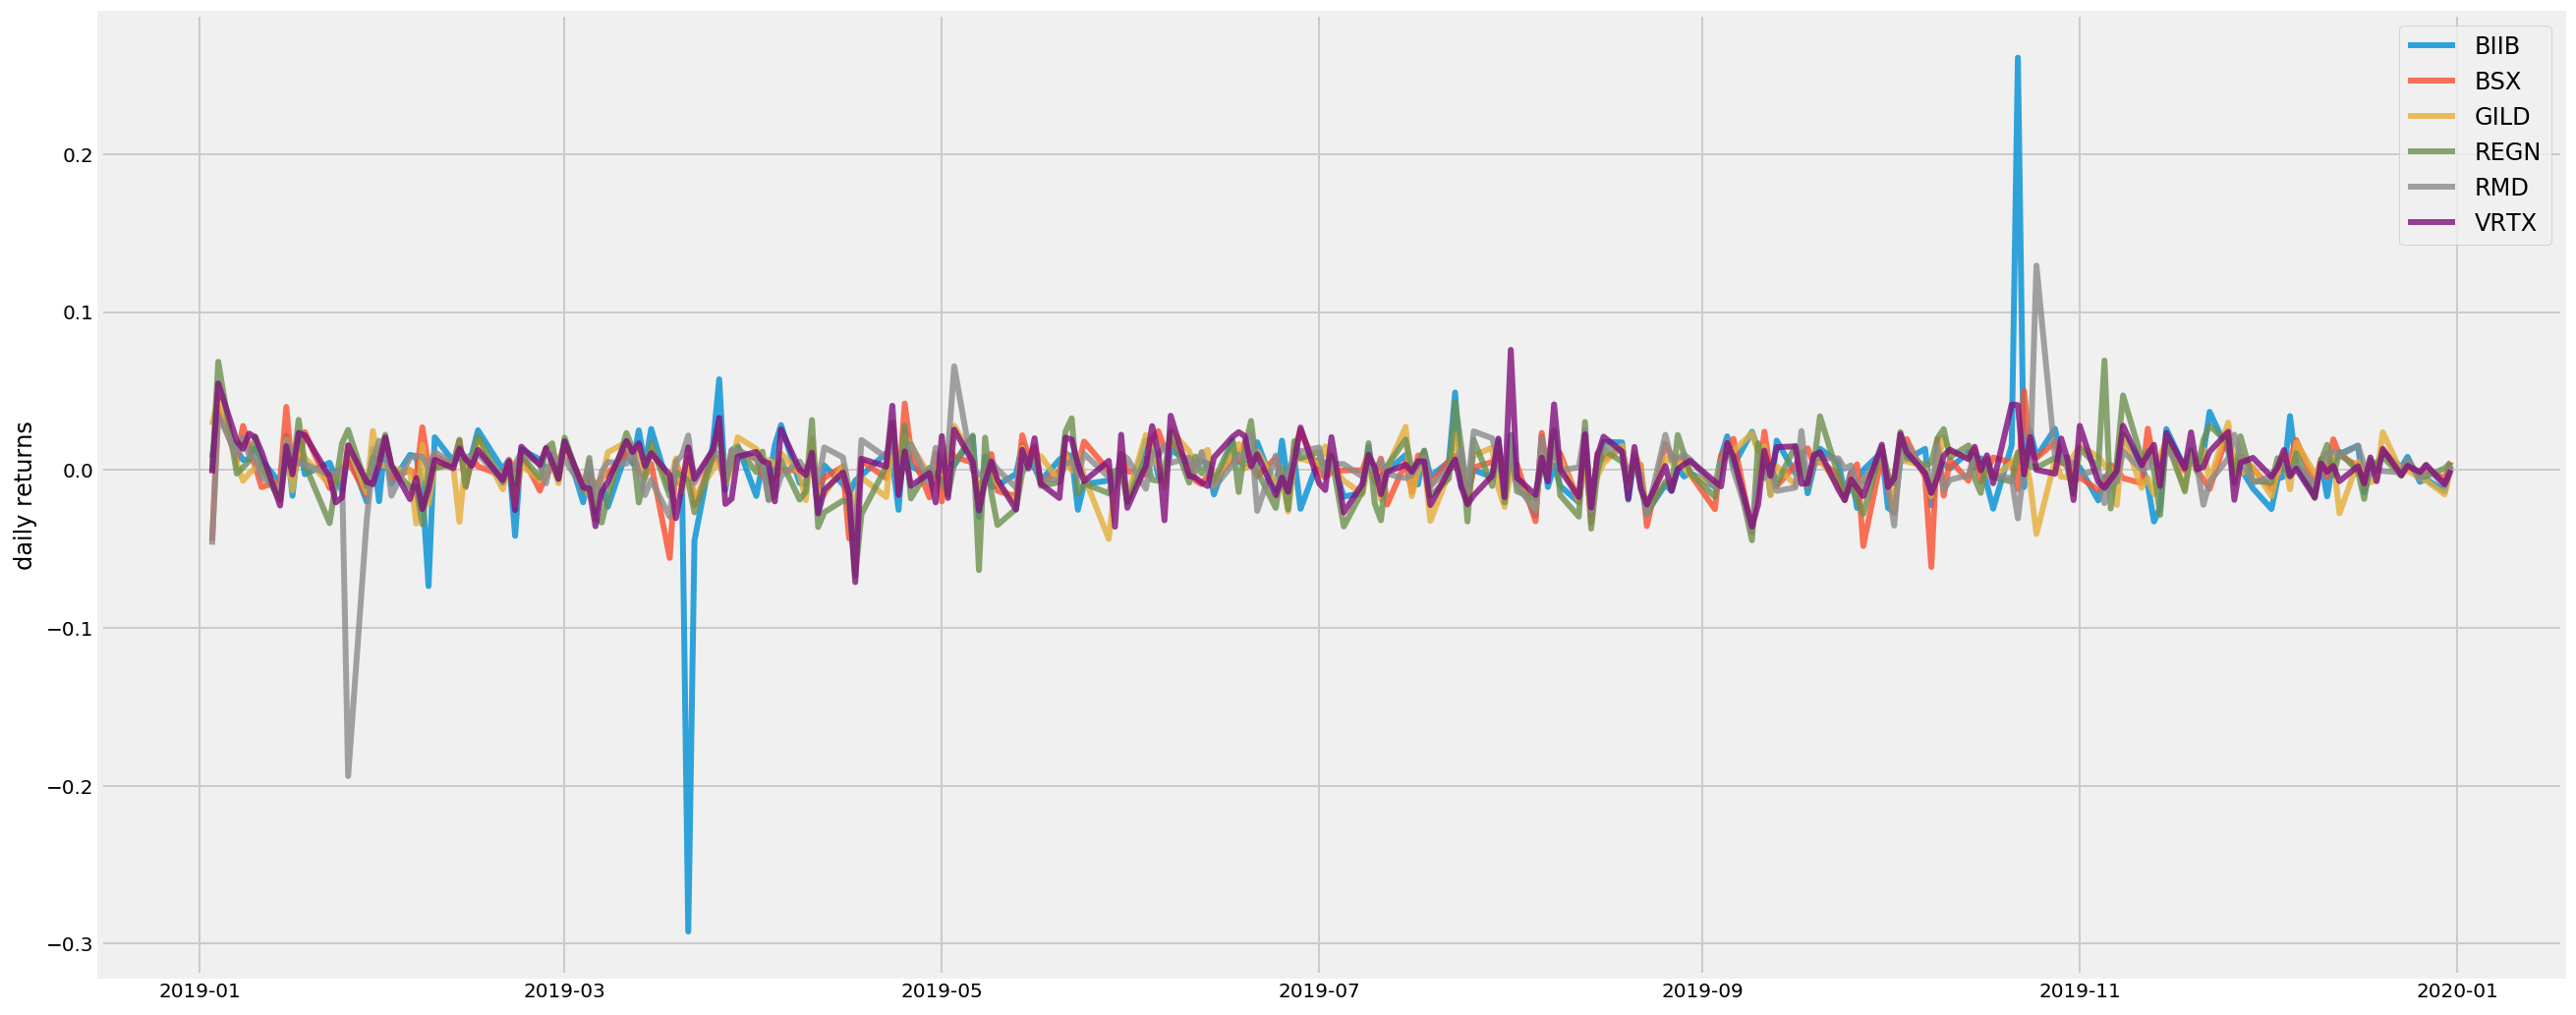

In [26]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

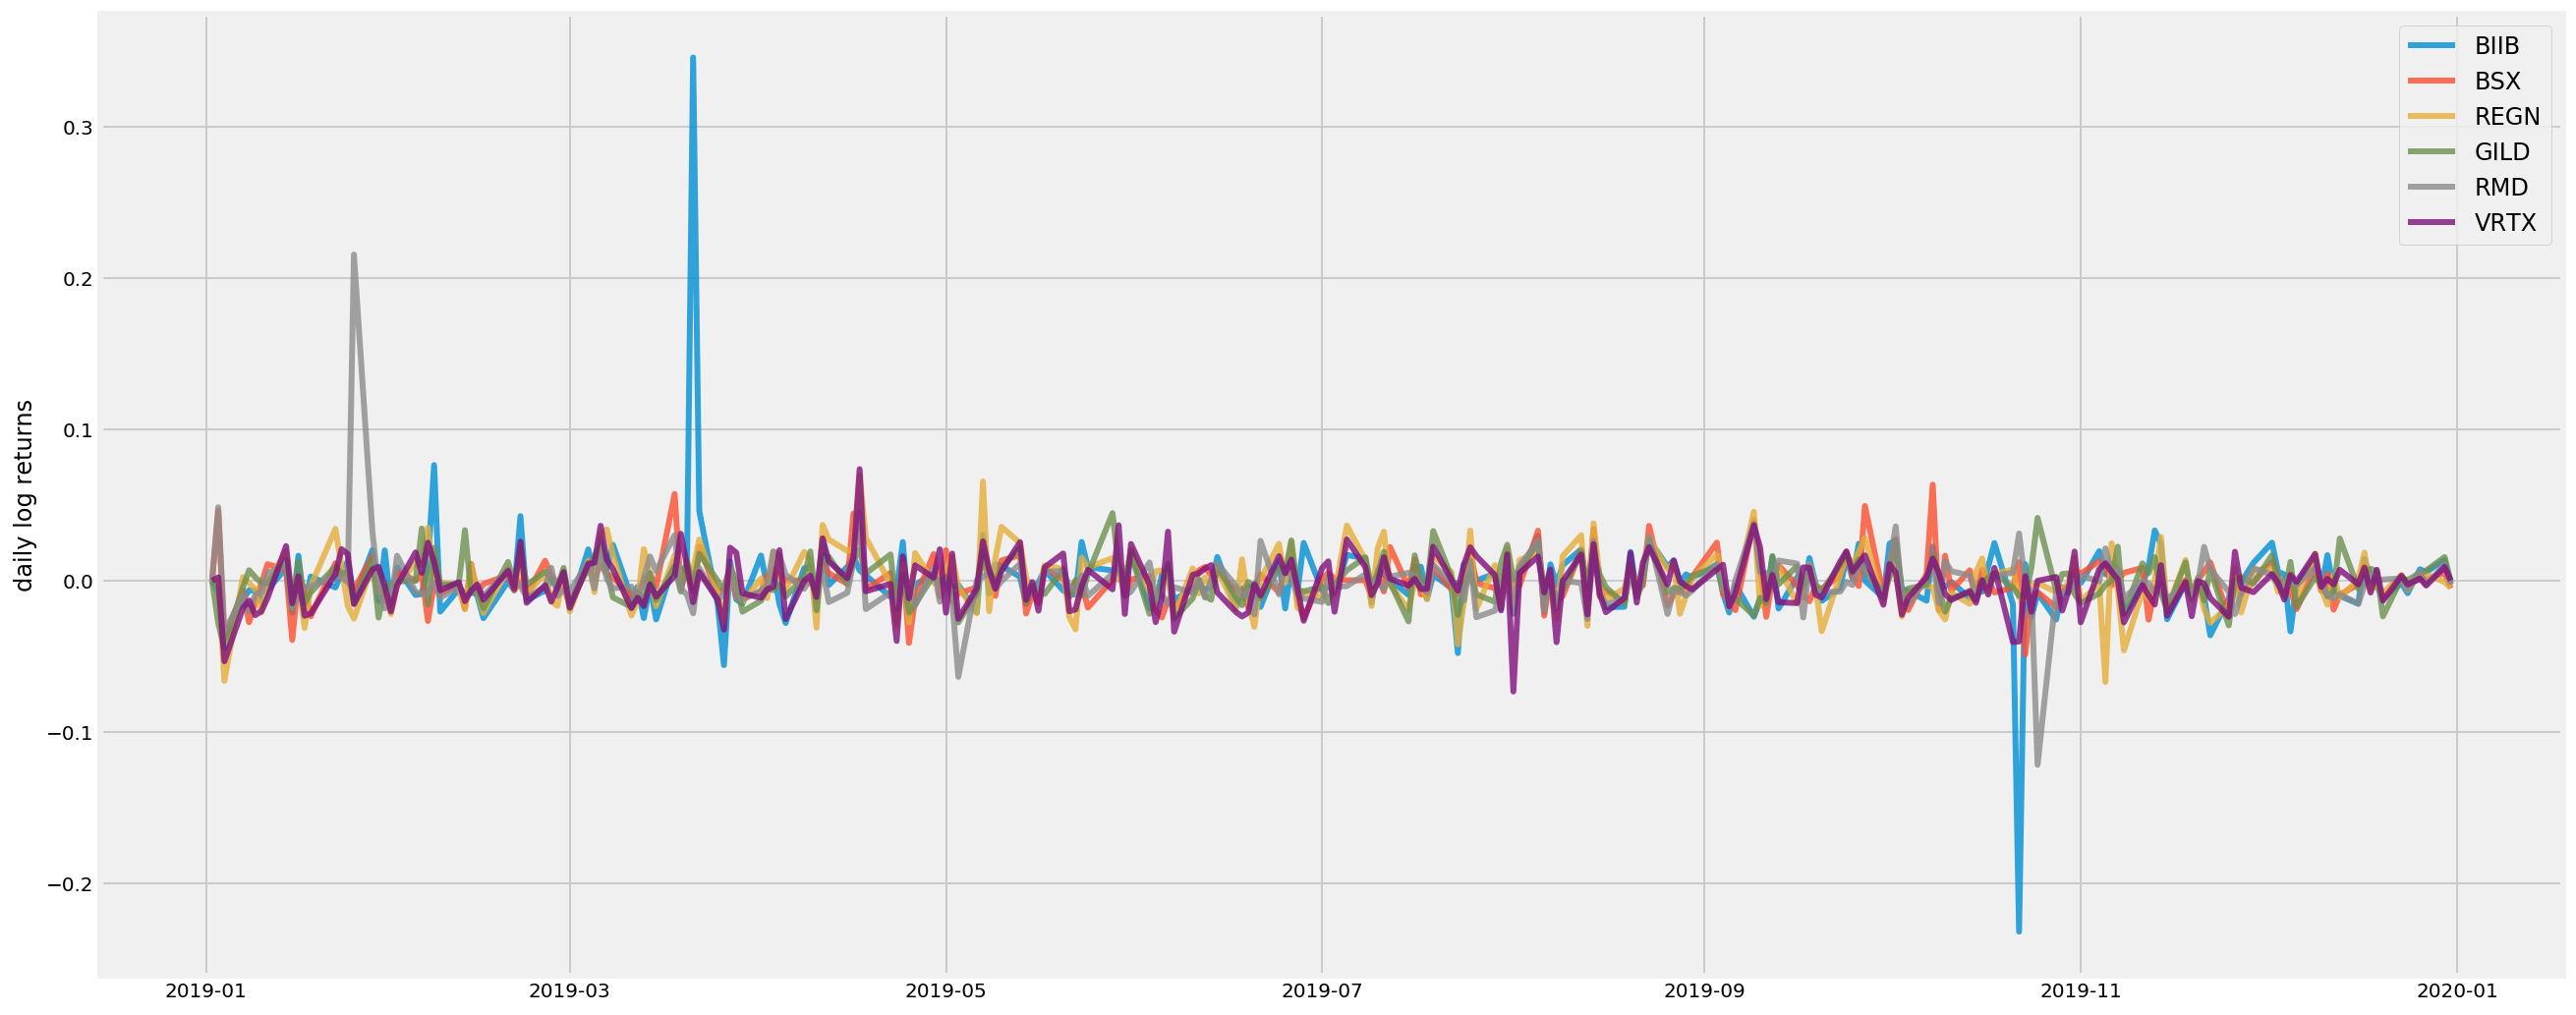

In [27]:
log = pd.DataFrame(columns = healthcare, index = table.index)

for i in range(len(healthcare)):
    log_list = []
    for j in range(len(table[healthcare[i]])):
        if(j+1<len(table[healthcare[i]])):
            log_returns =  np.log(table[healthcare[i]][j]) - np.log(table[healthcare[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[healthcare[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

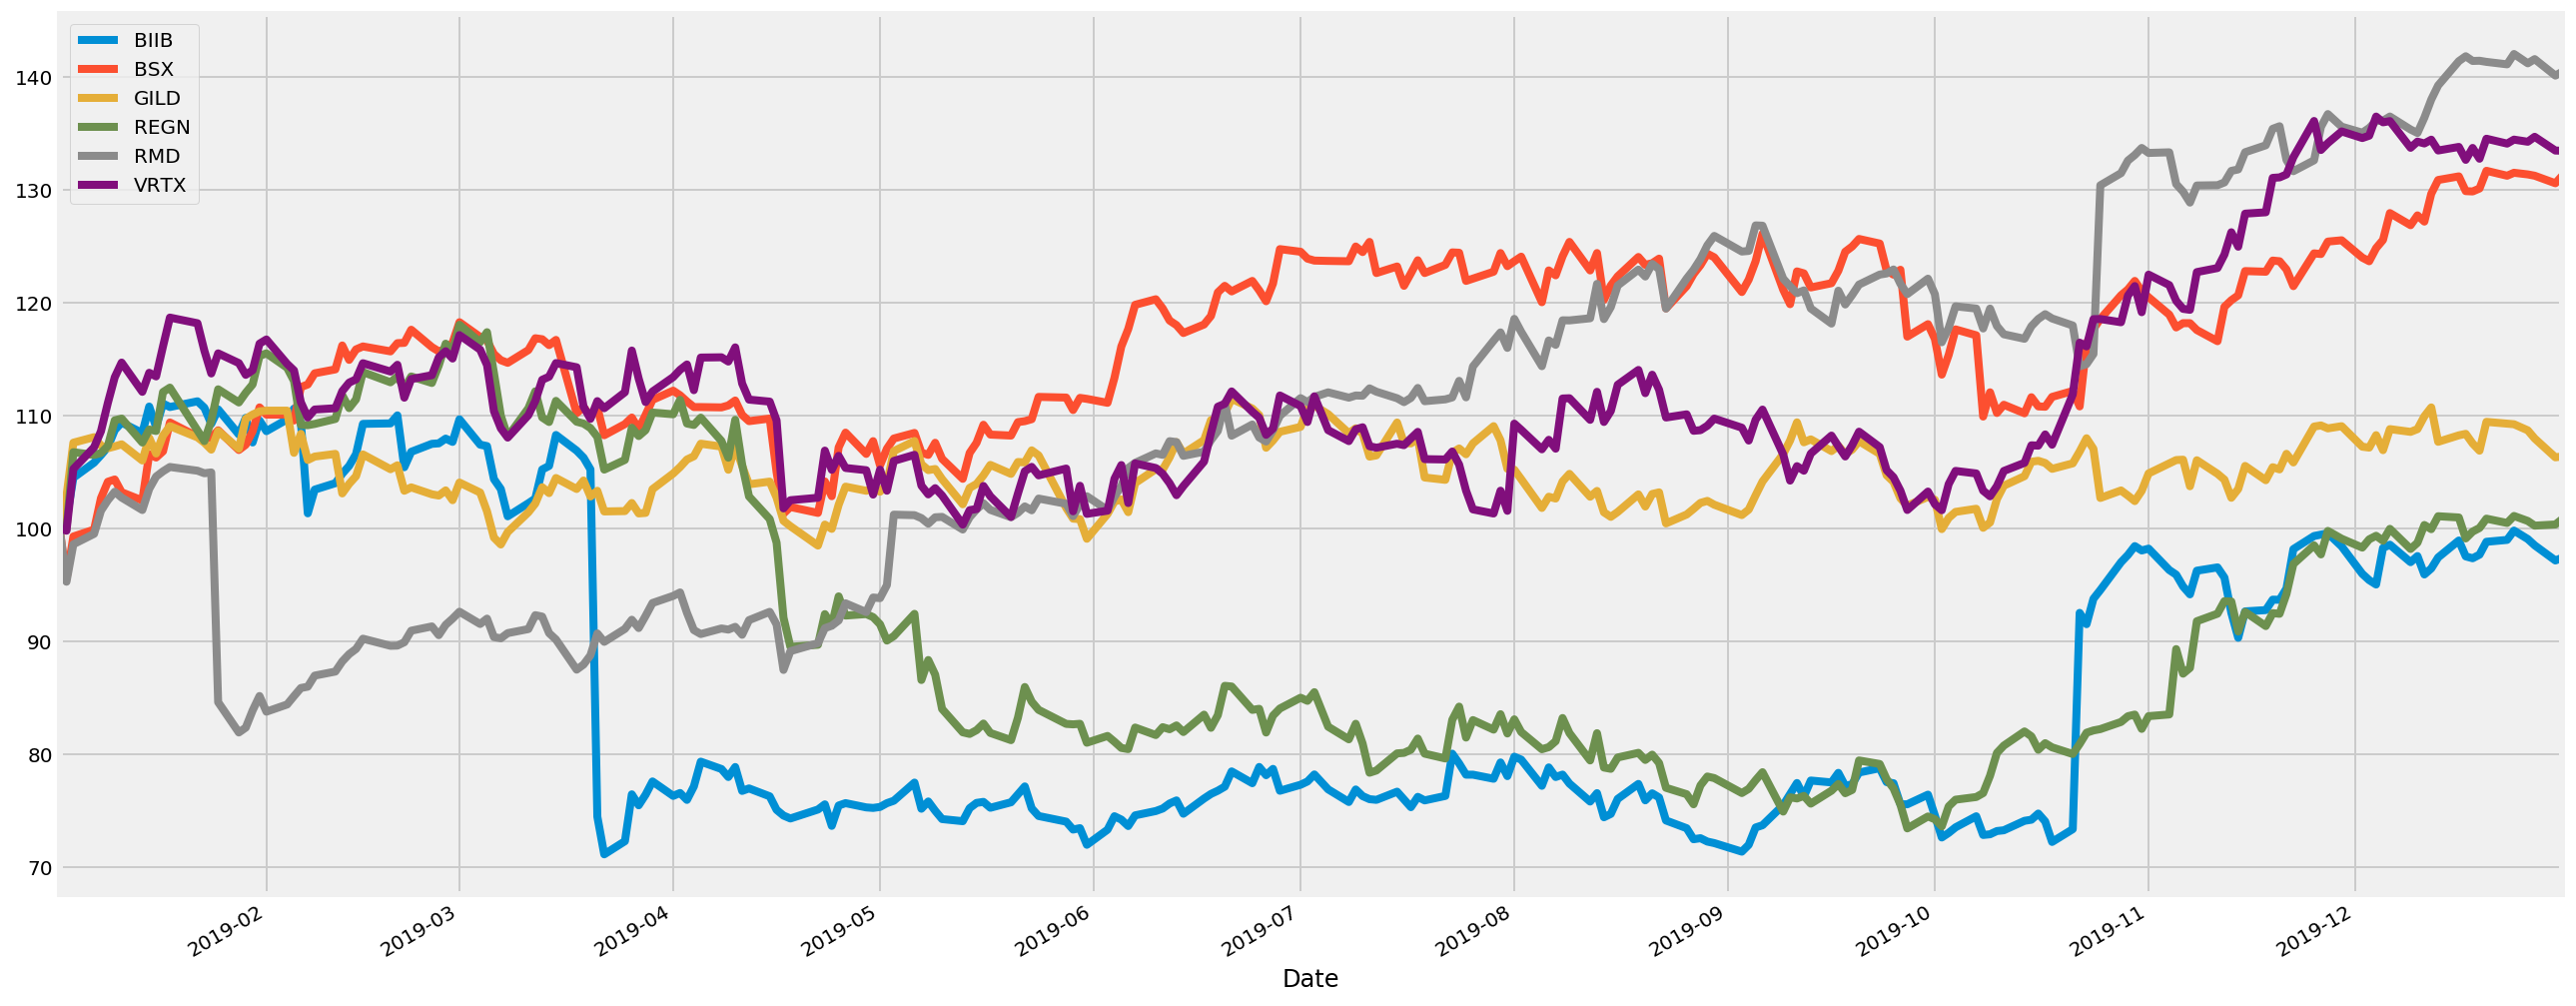

In [28]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [29]:
returns

,BIIB,BSX,GILD,REGN,RMD,VRTX
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.007581,-0.044980,0.028531,-0.000967,-0.047329,-0.002133
2019-01-04,0.036905,0.039502,0.045977,0.068453,0.034842,0.054785
2019-01-07,0.012785,0.006139,0.004542,-0.002314,0.009347,0.018240
2019-01-08,0.006328,0.027891,-0.006855,0.001588,0.020590,0.013307
...,...,...,...,...,...,...
2019-12-24,0.008323,0.001990,-0.000449,0.006173,0.006487,0.002637
2019-12-26,-0.007498,-0.001104,-0.004946,-0.004382,-0.005807,-0.001406
2019-12-27,-0.005633,-0.000884,-0.006628,-0.004108,0.002632,0.003269


In [30]:
log.mean()*252

BIIB    0.026472
BSX    -0.271740
REGN   -0.008129
GILD   -0.061727
RMD    -0.339581
VRTX   -0.288489
dtype: float64

In [31]:
log.std()*252**0.5

BIIB    0.486219
BSX     0.236026
REGN    0.290247
GILD    0.212090
RMD     0.319774
VRTX    0.267823
dtype: float64

In [32]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(6)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return(results, weights_record)

mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 50000
risk_free_rate = 0.02

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.34
Annualised Volatility: 0.2


            BIIB    BSX  GILD  REGN    RMD  VRTX
allocation  2.91  25.42   0.0  0.29  36.98  34.4
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.17


            BIIB    BSX   GILD  REGN   RMD  VRTX
allocation  3.26  23.56  45.63  1.75  17.7   8.1


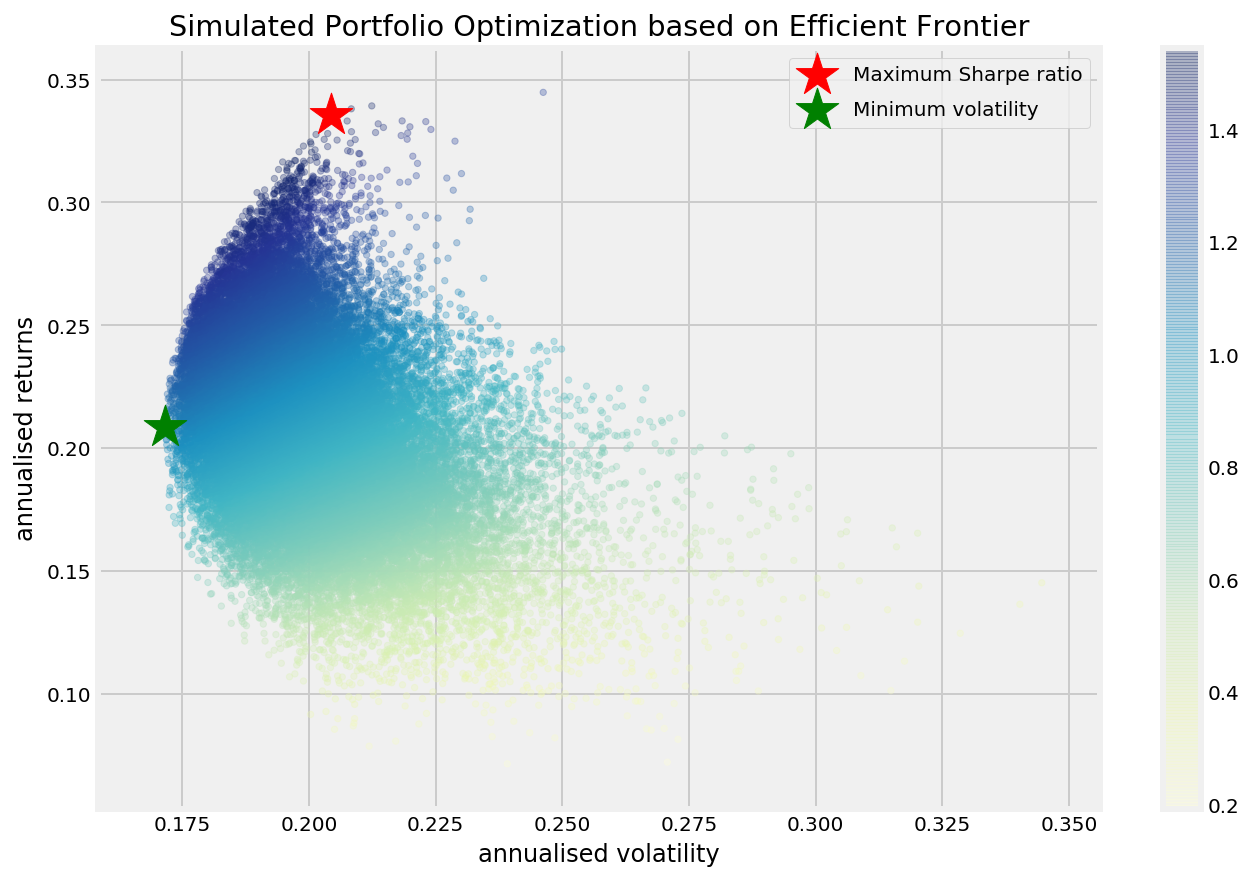

In [33]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)